# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pickle
import time
import sqlite3


### Importing Data

In [2]:
cnx = sqlite3.connect('datasets/FPA_FOD_20170508.sqlite')

In [3]:
df = pd.read_sql_query("SELECT * FROM 'Fires'", cnx)
df

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,...,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head(5)
df.describe()

,OBJECTID,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,CONT_DATE,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE
count,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,9.889340e+05,988934.000000,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06
mean,9.402330e+05,5.484020e+07,2.003710e+03,2.453064e+06,1.647191e+02,5.979037e+00,2.453238e+06,172.656766,7.452016e+01,3.678121e+01,-9.570494e+01,1.059658e+01
std,5.428436e+05,1.011963e+08,6.663099e+00,2.434573e+03,9.003891e+01,3.483860e+00,2.687548e+03,84.320348,2.497598e+03,6.139031e+00,1.671694e+01,4.404662e+00
min,1.000000e+00,1.000000e+00,1.992000e+03,2.448622e+06,1.000000e+00,1.000000e+00,2.448622e+06,1.000000,1.000000e-05,1.793972e+01,-1.788026e+02,0.000000e+00
25%,4.701170e+05,5.055000e+05,1.998000e+03,2.451084e+06,8.900000e+01,3.000000e+00,2.450701e+06,102.000000,1.000000e-01,3.281860e+01,-1.103635e+02,8.000000e+00
50%,9.402330e+05,1.067761e+06,2.004000e+03,2.453178e+06,1.640000e+02,5.000000e+00,2.453466e+06,181.000000,1.000000e+00,3.545250e+01,-9.204304e+01,1.400000e+01
75%,1.410349e+06,1.910639e+07,2.009000e+03,2.455036e+06,2.300000e+02,9.000000e+00,2.455754e+06,232.000000,3.300000e+00,4.082720e+01,-8.229760e+01,1.400000e+01
max,1.880465e+06,3.003484e+08,2.015000e+03,2.457388e+06,3.660000e+02,1.300000e+01,2.457392e+06,366.000000,6.069450e+05,7.033060e+01,-6.525694e+01,1.500000e+01


In [6]:
df.shape

df['FIRE_SIZE_CLASS'].value_counts(normalize = True)

B    0.499545
A    0.354656
C    0.117033
D    0.015117
E    0.007502
F    0.004140
G    0.002006
Name: FIRE_SIZE_CLASS, dtype: float64

### Cleaning

To improve the efficacy of the next steps in this process, we'll clean the data to ensure the our dataset only contains complete data.

#### Removing Null Values

In [7]:
df.isna().sum()

OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555636
FIRE_NAME                      957189
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE                      891531
CONT_DOY    

#### Distributions of Datasets

Before we drop values, let's look at the distributions of the datasets with and without time/date data. This data is valuable, but it contains a large number of missing values.

#### Distribution with Date of Containment

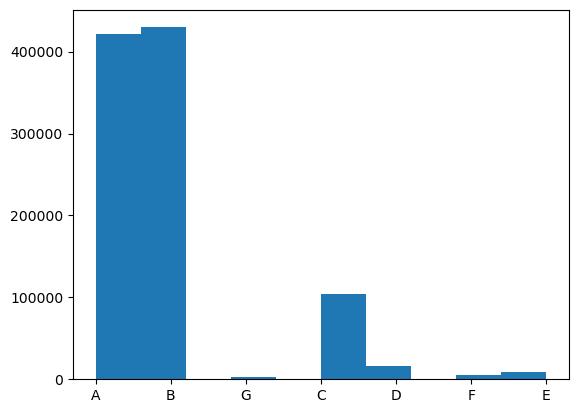

In [8]:
 plt.hist(df['FIRE_SIZE_CLASS'][~df['CONT_DOY'].isna()]);

#### Distribution without Date of Containment

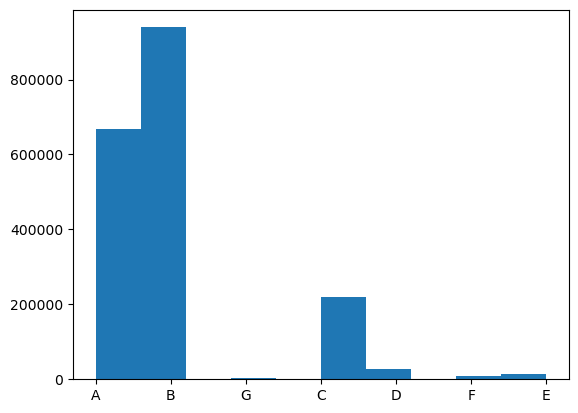

In [9]:
plt.hist(df['FIRE_SIZE_CLASS']);

The feature DOY Containment doesn't meaningfully change the distribution of values and so we will remove the null values from this feature.

#### Creating Duration Column

Before we drop mull values, we will create a duration column

In [10]:
df['duration'] = np.where(df['CONT_DOY']>=df['DISCOVERY_DOY'], 
                           df['CONT_DOY']-df['DISCOVERY_DOY'], 
                           (365-df['DISCOVERY_DOY'])+df['CONT_DOY'])

In [11]:
df_clean = df[~df['duration'].isna()]

In [12]:
df_clean = df_clean.dropna(axis=1)

In [13]:
df_clean.shape

(988934, 26)

In [14]:
df_clean['duration']

0          0.0
1          0.0
2          0.0
3          5.0
4          5.0
          ... 
1880456    0.0
1880457    1.0
1880458    5.0
1880459    0.0
1880460    0.0
Name: duration, Length: 988934, dtype: float64

In [15]:
df_clean.isna().sum().sum()

0

The result of dropping null values in the dataset is losing features, not rows. The resulting dataset is 17 columns narrower, but we haven't removed any rows. We'll further trim the remaining features to determine which features are most important before proceeding to feature engineering.

#### Checking for Duplicates

Let's check for duplicate values in the dataset before we proceed. This portion of the process will become more difficult once we begin to manipulate the data.


In [16]:
duplicates = df_clean.duplicated(subset=['OBJECTID', 'SOURCE_REPORTING_UNIT'])

Based on the above line, there are no duplicated values in the dataset

### Pruning Unnecessary Features

Our goal with this analysis is to predict the overall fire size. Given this problem statement, we can now remove features included in the data that are clearly irrelevant to the task.

In [17]:
df_clean.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE',
       'DISCOVERY_DOY', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE',
       'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'Shape', 'duration'],
      dtype='object')

#### NWCG Reporting Agency

In [18]:
df_clean['NWCG_REPORTING_AGENCY'].value_counts()

ST/C&L    516169
FS        218098
BIA       119478
BLM        96857
NPS        18168
FWS        16372
TRIBE       3709
DOD           43
IA            25
BOR           14
DOE            1
Name: NWCG_REPORTING_AGENCY, dtype: int64

The reporting agency is well distributed,numerous ,and may be valuable to the overall mission of the analysis. We would have likely removed this feature if there were only several important agencies included in the list.

#### NWCG_REPORTING_UNIT_NAME & NWCG_REPORTING_UNIT_ID

In [19]:
df_clean['NWCG_REPORTING_UNIT_NAME'].value_counts(ascending = False)

Georgia Forestry Commission                  97695
Fire Department of New York                  67415
Mississippi Forestry Commission              38572
South Carolina Forestry Commission           32063
Alabama Forestry Commission                  29287
                                             ...  
Karl Mundt National Wildlife Refuge              1
Coleman National Fish Hatchery                   1
Steigerwald Lake National Wildlife Refuge        1
Montezuma Castle National Monument               1
Fallon - Churchill County Fire Department        1
Name: NWCG_REPORTING_UNIT_NAME, Length: 1247, dtype: int64

Similar to the NWCG_REPORTING_AGENCY feature, NWCG_REPORTING_UNIT_NAME has a diverse group of agencies. However because there are so many agencies that are only mentioned once, we'll remove this feature entirely.

This is because the agencies that are only reported once could represent a form of data leakage for our model. It's possible that the agencies that are only represented once in the above list could have an outsized influence on the overall result of the model. It would be better if this individual feature were balanced. 

#### OWNER_DESCR

This feature describes the type of land the fire was reported on. It's likely that the resultant size of a fire is dependent on the time it takes for authorities to discover the fire. If a fire originates in an area that humans frequent, this improves the likelyhood a fire is extinguished before it becomes uncontrollable.

As we move through our analysis, this feature could be beneficial, as we don't know if private property or government land would be more or less likely to be occupied. We'll opt to remove this column.

In [20]:
df_clean['OWNER_DESCR'].value_counts()

MISSING/NOT SPECIFIED    271377
PRIVATE                  258720
USFS                     186137
BIA                      106368
BLM                       63205
STATE OR PRIVATE          31644
STATE                     25041
NPS                       14965
FWS                        9696
TRIBAL                     8916
OTHER FEDERAL              6216
MUNICIPAL/LOCAL            3375
UNDEFINED FEDERAL          1492
COUNTY                     1486
BOR                         284
FOREIGN                      12
Name: OWNER_DESCR, dtype: int64

This feature is well balanced and could be valuable to the result

#### FIRE_SIZE_CLASS

In [21]:
df_clean['FIRE_SIZE_CLASS'].value_counts()

B    429692
A    421865
C    103618
D     15720
E      9016
F      5802
G      3221
Name: FIRE_SIZE_CLASS, dtype: int64

This feature is concerning because it may be based on the target feature for this analysis. Because Fire Size Class is likely calculated using the Fire Size, we'll need to remove this feature to get a reasonable prediction

#### SOURCE_REPORTING_NAME

SOURCE_REPORTING_NAME represents a duplicate, but numerical, version of the feature called SOURCE_REPORTING_ID. We'll remove this feature

In [22]:
remove_cols = ['OBJECTID','Shape','FOD_ID','FPA_ID','NWCG_REPORTING_UNIT_NAME',
               'NWCG_REPORTING_UNIT_ID','OWNER_DESCR',
               'SOURCE_SYSTEM','DISCOVERY_DATE','SOURCE_REPORTING_UNIT','NWCG_REPORTING_AGENCY']

In [23]:
df_clean = df_clean.drop(remove_cols,axis=1)

In [24]:
df_clean

,SOURCE_SYSTEM_TYPE,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DOY,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,STATE,duration
0,FED,Plumas National Forest,2005,33,9.0,Miscellaneous,2453403.5,33.0,0.10,A,40.036944,-121.005833,5.0,CA,0.0
1,FED,Eldorado National Forest,2004,133,1.0,Lightning,2453137.5,133.0,0.25,A,38.933056,-120.404444,5.0,CA,0.0
2,FED,Eldorado National Forest,2004,152,5.0,Debris Burning,2453156.5,152.0,0.10,A,38.984167,-120.735556,13.0,CA,0.0
3,FED,Eldorado National Forest,2004,180,1.0,Lightning,2453189.5,185.0,0.10,A,38.559167,-119.913333,5.0,CA,5.0
4,FED,Eldorado National Forest,2004,180,1.0,Lightning,2453189.5,185.0,0.10,A,38.559167,-119.933056,5.0,CA,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880456,NONFED,Tehama-Glenn Unit,2015,165,13.0,Missing/Undefined,2457187.5,165.0,2.22,B,40.019907,-122.391398,13.0,CA,0.0
1880457,NONFED,Shasta-Trinity Unit,2015,273,7.0,Arson,2457296.5,274.0,1.00,B,40.588583,-123.069617,13.0,CA,1.0
1880458,NONFED,Humboldt-Del Norte Unit,2015,213,1.0,Lightning,2457240.5,218.0,4.00,B,40.244833,-123.544167,15.0,CA,5.0
1880459,NONFED,Sonoma-Lake Napa Unit,2015,148,9.0,Miscellaneous,2457170.5,148.0,0.50,B,38.415608,-122.660044,13.0,CA,0.0


In [25]:
df_clean['FIRE_YEAR'].sort_values(ascending= True)

202991     1992
697494     1992
1384206    1992
1384205    1992
697495     1992
           ... 
1814464    2015
1814465    2015
1814466    2015
1814453    2015
1880460    2015
Name: FIRE_YEAR, Length: 988934, dtype: int64

In [26]:
model = ['DISCOVERY_DOY','STAT_CAUSE_DESCR',
         'STATE','SOURCE_SYSTEM_TYPE','duration','FIRE_SIZE_CLASS']
description = ['SOURCE_REPORTING_UNIT_NAME','FIRE_YEAR',
               'DISCOVERY_DOY','FIRE_SIZE','LATITUDE','LONGITUDE',
               'STATE','duration','STAT_CAUSE_DESCR']

In [27]:
#df.to_csv('data_cleaned.csv',index = False)

In [28]:
df_model = df_clean[model]

In [29]:
df_description = df_clean[description]

In [30]:
df_description

,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,duration,STAT_CAUSE_DESCR
0,Plumas National Forest,2005,33,0.10,40.036944,-121.005833,CA,0.0,Miscellaneous
1,Eldorado National Forest,2004,133,0.25,38.933056,-120.404444,CA,0.0,Lightning
2,Eldorado National Forest,2004,152,0.10,38.984167,-120.735556,CA,0.0,Debris Burning
3,Eldorado National Forest,2004,180,0.10,38.559167,-119.913333,CA,5.0,Lightning
4,Eldorado National Forest,2004,180,0.10,38.559167,-119.933056,CA,5.0,Lightning
...,...,...,...,...,...,...,...,...,...
1880456,Tehama-Glenn Unit,2015,165,2.22,40.019907,-122.391398,CA,0.0,Missing/Undefined
1880457,Shasta-Trinity Unit,2015,273,1.00,40.588583,-123.069617,CA,1.0,Arson
1880458,Humboldt-Del Norte Unit,2015,213,4.00,40.244833,-123.544167,CA,5.0,Lightning
1880459,Sonoma-Lake Napa Unit,2015,148,0.50,38.415608,-122.660044,CA,0.0,Miscellaneous


In [31]:
df_model

,DISCOVERY_DOY,STAT_CAUSE_DESCR,STATE,SOURCE_SYSTEM_TYPE,duration,FIRE_SIZE_CLASS
0,33,Miscellaneous,CA,FED,0.0,A
1,133,Lightning,CA,FED,0.0,A
2,152,Debris Burning,CA,FED,0.0,A
3,180,Lightning,CA,FED,5.0,A
4,180,Lightning,CA,FED,5.0,A
...,...,...,...,...,...,...
1880456,165,Missing/Undefined,CA,NONFED,0.0,B
1880457,273,Arson,CA,NONFED,1.0,B
1880458,213,Lightning,CA,NONFED,5.0,B
1880459,148,Miscellaneous,CA,NONFED,0.0,B


In [32]:
df_description.to_csv('datasets/data_description.csv',index = False)

In [33]:
df_model.to_csv('datasets/data_model.csv',index = False)

### Saving dfs as variables using Pickle

In [34]:
with open('pickles/df_description.pkl', 'wb') as f:
    pickle.dump(df_description, f)
    
with open('pickles/df_model.pkl', 'wb') as f:
    pickle.dump(df_model, f)

In [35]:
df_model.shape

(988934, 6)